In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./data/parkinsons.csv')

Title: Parkinsons Disease Data Set

Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A

Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice status - Health status of the subject (one) - Parkinson's, (zero) - healthy RPDE,D2 - Two nonlinear dynamical complexity measures DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [4]:
data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
data.shape

(195, 24)

In [8]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
data[data.duplicated()]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


C:\Users\alokk\AppData\Local\Temp\ipykernel_3324\1904137638.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))


<Axes: >

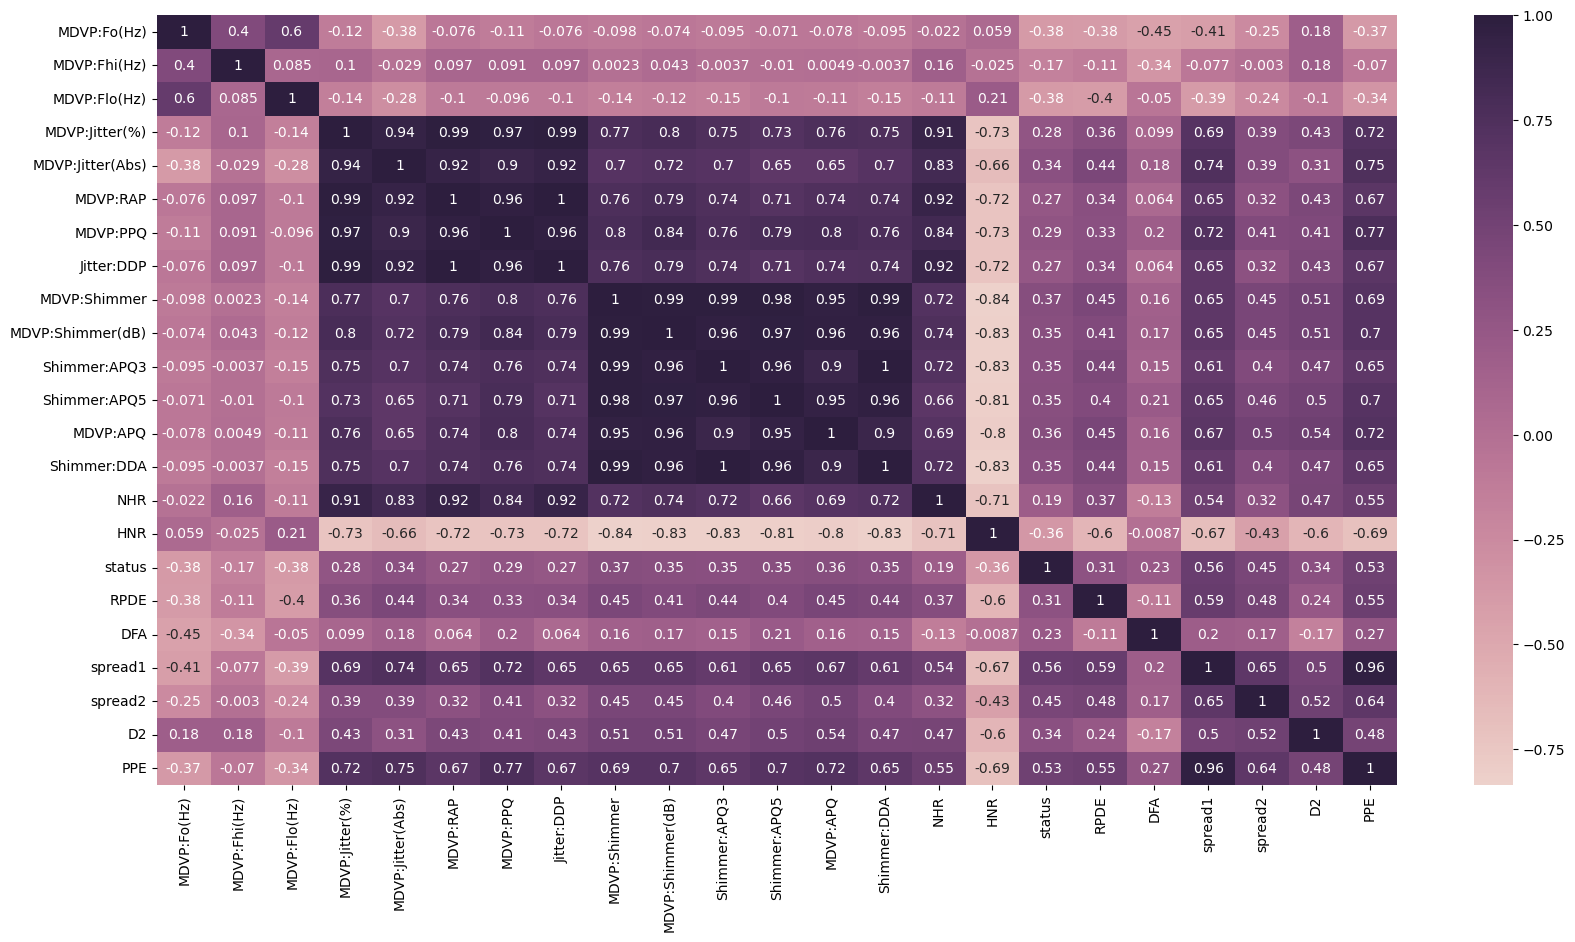

In [10]:
# different cmap values can be found here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

In [11]:
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [12]:
#Splitting the dataset into features x and columns y
features = data.drop(columns=['name','status'])  #Exclude name which wil act as noise and status which is our target variable
target = data['status']

In [13]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, random_state=200, test_size=0.2, stratify=target)

In [14]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from catboost import CatBoostClassifier

In [15]:

# Initialize models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(kernel='linear')),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Gaussian Process', GaussianProcessClassifier()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('Bagging', BaggingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('CatBoost', CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass'))
]

# Train and evaluate each model
for name, model in models:
    if name == 'CatBoost':
        model.fit(feature_train, target_train, eval_set=(feature_test, target_test), verbose=False)
        accuracy = model.score(feature_test, target_test)
    else:
        model.fit(feature_train, target_train)
        accuracy = model.score(feature_test, target_test)
    print(f'{name} Accuracy: {accuracy * 100:.2f} %')


Logistic Regression Accuracy: 82.05 %
Decision Tree Accuracy: 89.74 %
Random Forest Accuracy: 87.18 %
SVM Accuracy: 84.62 %
K-Nearest Neighbors Accuracy: 89.74 %
Naive Bayes Accuracy: 69.23 %
Neural Network Accuracy: 38.46 %
Gradient Boosting Accuracy: 94.87 %
Linear Discriminant Analysis Accuracy: 82.05 %
Gaussian Process Accuracy: 92.31 %
Extra Trees Accuracy: 92.31 %
Bagging Accuracy: 89.74 %
AdaBoost Accuracy: 82.05 %
CatBoost Accuracy: 89.74 %


In [21]:
for name, model in models:
    if name == 'CatBoost':
        model.fit(feature_train, target_train, eval_set=(feature_train, target_train), verbose=False)
        accuracy = model.score(feature_train, target_train)
    else:
        model.fit(feature_train, target_train)
        accuracy = model.score(feature_train, target_train)
    print(f'{name} Accuracy: {accuracy * 100:.2f} %')

Logistic Regression Accuracy: 87.82 %
Decision Tree Accuracy: 100.00 %
Random Forest Accuracy: 100.00 %
SVM Accuracy: 88.46 %
K-Nearest Neighbors Accuracy: 92.95 %
Naive Bayes Accuracy: 73.72 %
Neural Network Accuracy: 75.64 %
Gradient Boosting Accuracy: 100.00 %
Linear Discriminant Analysis Accuracy: 88.46 %
Gaussian Process Accuracy: 100.00 %
Extra Trees Accuracy: 100.00 %
Bagging Accuracy: 99.36 %
AdaBoost Accuracy: 100.00 %
CatBoost Accuracy: 100.00 %


In [22]:
names = []
scores = []

for name, model in models:
    model.fit(feature_train, target_train)
    accuracy = model.score(feature_train, target_train)
    names.append(name)
    scores.append(accuracy*100)

C:\Users\alokk\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0:	learn: 0.6581920	total: 14.2ms	remaining: 1.41s
1:	learn: 0.6201921	total: 26ms	remaining: 1.27s
2:	learn: 0.5869058	total: 37.1ms	remaining: 1.2s
3:	learn: 0.5609211	total: 48.5ms	remaining: 1.16s
4:	learn: 0.5250635	total: 60.1ms	remaining: 1.14s
5:	learn: 0.4955241	total: 71.1ms	remaining: 1.11s
6:	learn: 0.4768124	total: 82.8ms	remaining: 1.1s
7:	learn: 0.4570553	total: 93.1ms	remaining: 1.07s
8:	learn: 0.4366481	total: 102ms	remaining: 1.03s
9:	learn: 0.4199629	total: 114ms	remaining: 1.03s
10:	learn: 0.3973527	total: 128ms	remaining: 1.03s
11:	learn: 0.3824506	total: 142ms	remaining: 1.04s
12:	learn: 0.3658314	total: 153ms	remaining: 1.02s
13:	learn: 0.3563028	total: 164ms	remaining: 1.01s
14:	learn: 0.3431287	total: 176ms	remaining: 997ms
15:	learn: 0.3330321	total: 185ms	remaining: 972ms
16:	learn: 0.3221594	total: 199ms	remaining: 970ms
17:	learn: 0.3098102	total: 219ms	remaining: 997ms
18:	learn: 0.3005680	total: 301ms	remaining: 1.28s
19:	learn: 0.2904146	total: 378ms	rem

In [24]:
# export accuracy scores to csv file
accuracy_df = pd.DataFrame({'Model': names, 'Accuracy': scores})
accuracy_df.to_csv('./data/accuracy_scores_train.csv', index=False)


In [33]:
# test the svm model with different kernels

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(feature_train, target_train)
    accuracy = svm_model.score(feature_test, target_test)
    print(f'{kernel} Accuracy: {accuracy * 100}%')

linear Accuracy: 84.61538461538461%
poly Accuracy: 79.48717948717949%
rbf Accuracy: 79.48717948717949%
sigmoid Accuracy: 74.35897435897436%


In [32]:
# test the logistic regression model with different solvers

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    lr_model = LogisticRegression(solver=solver)
    lr_model.fit(feature_train, target_train)
    accuracy = lr_model.score(feature_test, target_test)
    print(f'{solver} Accuracy: {accuracy * 100}%')



newton-cg Accuracy: 82.05128205128204%
lbfgs Accuracy: 79.48717948717949%
liblinear Accuracy: 82.05128205128204%
sag Accuracy: 74.35897435897436%
saga Accuracy: 74.35897435897436%


C:\Users\alokk\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alokk\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alokk\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C:\Users\alokk\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0:	learn: 0.6581920	total: 17.6ms	remaining: 1.74s
1:	learn: 0.6201921	total: 33.2ms	remaining: 1.63s
2:	learn: 0.5869058	total: 47.8ms	remaining: 1.54s
3:	learn: 0.5609211	total: 61.6ms	remaining: 1.48s
4:	learn: 0.5250635	total: 80.2ms	remaining: 1.52s
5:	learn: 0.4955241	total: 91.4ms	remaining: 1.43s
6:	learn: 0.4768124	total: 104ms	remaining: 1.38s
7:	learn: 0.4570553	total: 117ms	remaining: 1.35s
8:	learn: 0.4366481	total: 128ms	remaining: 1.3s
9:	learn: 0.4199629	total: 141ms	remaining: 1.27s
10:	learn: 0.3973527	total: 153ms	remaining: 1.24s
11:	learn: 0.3824506	total: 169ms	remaining: 1.24s
12:	learn: 0.3658314	total: 185ms	remaining: 1.24s
13:	learn: 0.3563028	total: 198ms	remaining: 1.22s
14:	learn: 0.3431287	total: 210ms	remaining: 1.19s
15:	learn: 0.3330321	total: 223ms	remaining: 1.17s
16:	learn: 0.3221594	total: 276ms	remaining: 1.35s
17:	learn: 0.3098102	total: 290ms	remaining: 1.32s
18:	learn: 0.3005680	total: 341ms	remaining: 1.46s
19:	learn: 0.2904146	total: 373ms	re

C:\Users\alokk\AppData\Local\Temp\ipykernel_3324\2887927364.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(names))


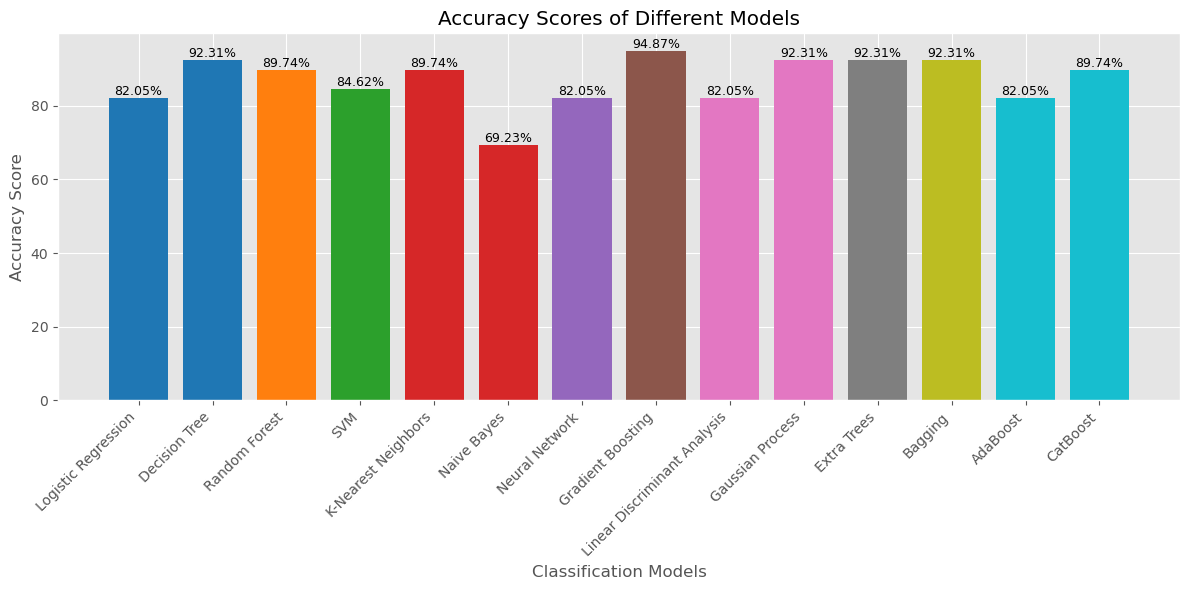

In [16]:

plt.style.use('ggplot')

names = []
scores = []

for name, model in models:
    model.fit(feature_train, target_train)
    accuracy = model.score(feature_test, target_test)
    names.append(name)
    scores.append(accuracy*100)
# Your previous code for model training and accuracy scoring...

plt.figure(figsize=(12, 6))
plt.title("Accuracy Scores of Different Models")
plt.xlabel("Classification Models")
plt.ylabel("Accuracy Score")

# Generating different colors for each bar
colors = plt.cm.get_cmap('tab10', len(names))

bars = plt.bar(names, scores, color=colors(np.arange(len(names))))

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{score:.2f}%',
             ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()